In [1]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import product

In [2]:
beta1 = 0.5
omega1 = 1 / 24
gamma1 = 1 / 5
beta2 = 0.2
omega2 = 1 / 14
gamma2 = 1 / 5
delta12 = 0.029
delta21 = 0.01
zeta12 = 0.032
zeta21 = 0.01
tau12_array = np.arange(0, 0.5, 0.01)
tau21_array = np.arange(0, 0.5, 0.01)
tau12_xx, tau21_yy = np.meshgrid(tau12_array, tau21_array)

In [3]:
def r0(beta1, beta2, omega1, omega2, gamma1, gamma2, tau12, tau21):
    b = - beta1 / (omega1 + gamma1 + tau12) - beta2 / (omega2 + gamma2 + tau21)
    c = (beta1 * beta2 - tau12 * tau21) / ((omega1 + gamma1 + tau12) * (omega2 + gamma2 + tau21))
    root1 = ( -b + np.sqrt(b ** 2 - 4 * c)) / 2
    root2 = ( -b - np.sqrt(b ** 2 - 4 * c)) / 2
    return np.maximum(root1, root2)



/tmp/ipykernel_888/3718452067.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


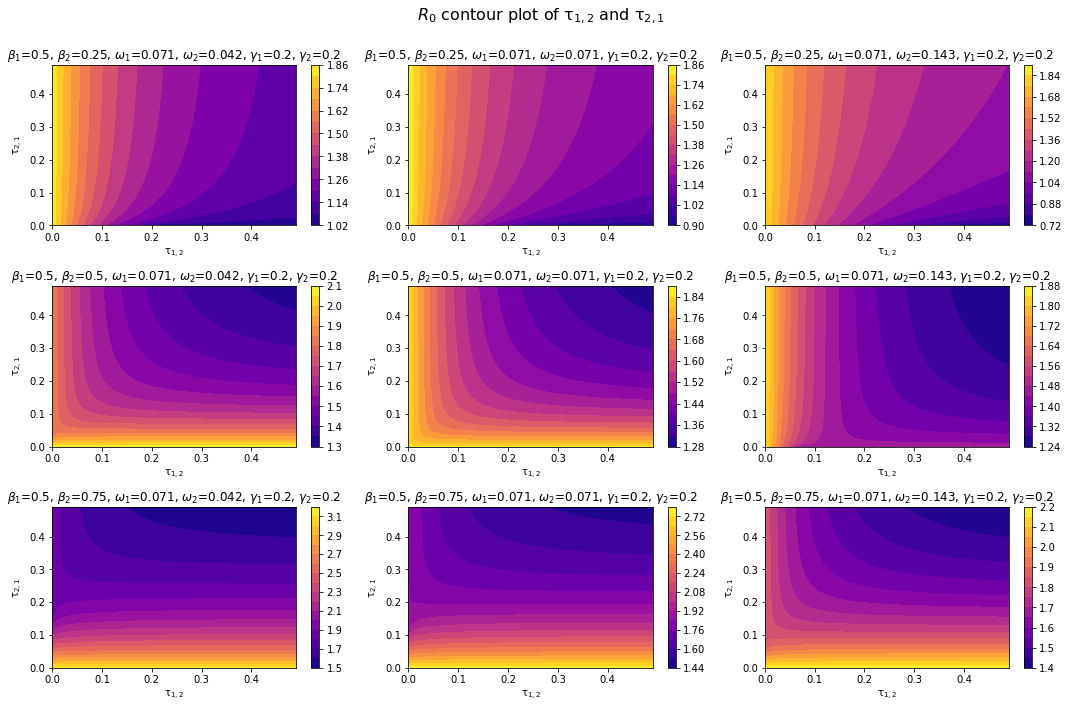

In [22]:
beta_combinations = [(0.5, 0.25), (0.5, 0.5), (0.5, 0.75)]
omega_combinations = [(1 / 14, 1 / 24), (1 / 14, 1 / 14), (1 / 14, 1 / 7)]
beta_omega_combinations = list(product(beta_combinations, omega_combinations))
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
for combination, ax in zip(beta_omega_combinations, axes.ravel()):
    beta1, beta2 = combination[0]
    omega1, omega2 = combination[1]
    r0_array_mesh = r0(beta1, beta2, omega1, omega2, gamma1, gamma2, tau12_xx, tau21_yy)
    cs = ax.contourf(tau12_xx, tau21_yy, r0_array_mesh, 15, cmap="plasma")
    ax.set_title(rf"$\beta_1$={beta1}, $\beta_2$={beta2}, $\omega_1$={omega1:.3f}, $\omega_2$={omega2:.3f}, $\gamma_1$={gamma1}, $\gamma_2$={gamma2}")
    ax.set_xlabel(r"$\mathregular{\tau_{1,2}}$")
    ax.set_ylabel(r"$\mathregular{\tau_{2,1}}$")
    fig.colorbar(cs, ax=ax)
fig.suptitle(r"$R_0$ contour plot of $\mathregular{\tau_{1,2}}$ and $\mathregular{\tau_{2,1}}$", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig("R_0_contour_plot.png", dpi=300)
fig.show()

In [29]:
q_dict = {1: np.array([1]), 2: np.array([2])}
array_dict = {}
for key, value in q_dict.items():
    x = np.array([value  ** 2 + 100])
    array_dict[key] = x 

In [30]:
q_dict

{1: array([1]), 2: array([2])}

In [31]:
array_dict

{1: array([[101]]), 2: array([[104]])}

In [32]:
q_array = [np.array([[i * 100, 0], [0, 1e-20]]) for i in range(5)]
q_array

[array([[0.e+00, 0.e+00],
        [0.e+00, 1.e-20]]),
 array([[1.e+02, 0.e+00],
        [0.e+00, 1.e-20]]),
 array([[2.e+02, 0.e+00],
        [0.e+00, 1.e-20]]),
 array([[3.e+02, 0.e+00],
        [0.e+00, 1.e-20]]),
 array([[4.e+02, 0.e+00],
        [0.e+00, 1.e-20]])]

In [37]:
q_array[0]

array([[0.e+00, 0.e+00],
       [0.e+00, 1.e-20]])

In [36]:
x_list = []
for i in range(5):
    x_list.append(x**2)

In [33]:
def solver(q):
    return q + 1

In [35]:
x_array = [solver(q) for q in q_array]
x_array

[array([[1., 1.],
        [1., 1.]]),
 array([[101.,   1.],
        [  1.,   1.]]),
 array([[201.,   1.],
        [  1.,   1.]]),
 array([[301.,   1.],
        [  1.,   1.]]),
 array([[401.,   1.],
        [  1.,   1.]])]